# Object Oriented Programming in Python

Knowledge needed to better read documentations: https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html
* Gain familiarity with class syntax
* Learn how to define and use class methods
* Understand public versus private attributes

### Class and Object

A **class** is an abstract definition of an object.  
- It defines similar data and methods shared by all object’s of that class
        - Data: states
        - Method: behaviors
        
An **object** is an instance of a class.
- The instantiation of a class is the process of creating a new object.  


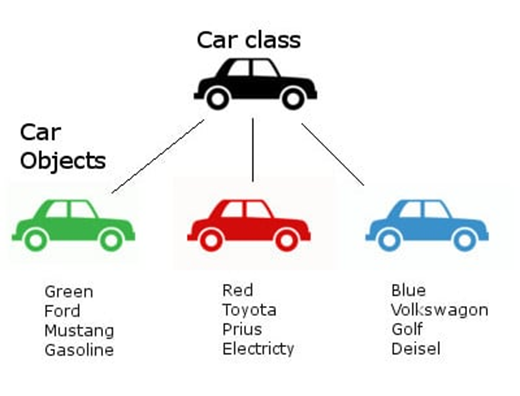

### What does a class look like in Python?

<b>This is a simple class declaration with a construtor method and two class variables</b>

In [9]:
class Wallet:
    
    def __init__(self, owner, cash):
        self.owner = owner
        self.cash = cash

What's going on here?
1. We defined a class `Wallet` which (in Python 3 only) automatically inherits from class `object`.  Placing `()` after class name is optional though unless inheriting from a base class other than `object` (yes classes are objects too!)
* `__init__` is a special method called <b>after</b> the instance of the class is made (it might be tempting to call it a constructor, but in fact it is not)
* `self` must be included in all non-static methods of a class.  It's a handle back to the instance.

In [10]:
# Create an instance of Wallet class (also called instantiating)
wallet = Wallet('Tom', 100)

In [11]:
# Who owns it? show the owner
wallet.owner

'Tom'

### Functions v.s. Methods
Python **function** is a sequence of statements that execute in a certain order, given a name. 
- They let us implement code reusability.


Python **method** is like a function, except it is attached to an object. 
- We call a method on an object, and it possibly makes changes to that object. 
- A method belongs to a class.
- `object.method()`


<b>What can we do with classes?</b>
* define **instance method** with `def` syntax from within classes using `self` keyword argument
* (Inheritence and overridding)
* Define public, protected and "private" instance attributes 
* Define static methods and class methods for data abstraction and encapsulation
* Of note, python has automatic garbage collection so we need not call a destructor method explicitly

<b>Let's add some methods to our Wallet class</b>

In [12]:
class Wallet:
    '''The Wallet class holds cash for a owner.'''
    
    def __init__(self, owner, cash):
        self.owner = owner
        self.cash = cash
        
    # Spend method
    def spend(self, amount):
        '''The spend method removes a given amount of money from the wallet.'''
        self.cash -= amount
            
    # Earn method
    def earn(self, amount):
        '''The earn method adds a given amount of money to the wallet.'''
        self.cash += amount

### EXERCISE:  Amy's Wallet
* Create an instance of a wallet for your friend Amy, the initial cash is 60
* Let Amy earn 50
* Let Amy spend money 99

In [13]:
# Call the constructor to create amy_wallet object
amy_wallet = Wallet('Amy', 60)

# Earn 50
amy_wallet.earn(50)

# Spend 99
amy_wallet.spend(99)

# check the remaining cash
amy_wallet.cash

11

### Public vs. "Private"
**Everything in Python is Public!**
* Single underscore aka "under": `_var` - designates a "private" class attribute, but still accessible if need be; 
purpose: tells other programmers that this attribute is off-limits.

<b>Let's make the Wallet safer by making `cash` "private"</b>
* We do this by placing one underscore ("under") before the variable name (e.g. `self._var`)
* Update the Wallet class here and make `cash` "private"

`We don’t use the term “private” here, since no attribute is really private in Python (without a generally unnecessary amount of work).` — PEP 8

`‘Private’ instance variables that cannot be accessed except from inside an object don’t exist in Python. However, there is a convention that is followed by most Python code: a name prefixed with an underscore (e.g. _spam) should be treated as a non-public part` — python docs

https://docs.python.org/2/tutorial/classes.html#private-variables-and-class-local-references

In [14]:
# Code up your solution here
class WalletSafe:
    '''The Wallet class holds cash for a owner.'''
    
    def __init__(self, owner, cash):
        self.owner = owner
        self._cash = cash
        
    # Spend method
    def spend(self, amount):
        '''The spend method removes a given amount of money from the wallet.'''
        self._cash -= amount
            
    # Earn method
    def earn(self, amount):
        '''The earn method adds a given amount of money to the wallet.'''
        self._cash += amount

In [15]:
# Call the constructor to create amy_wallet object
amy_wallet = WalletSafe('Amy', 60)

# print the owner of the wallet - works
print(amy_wallet.owner)

# print the cash inside - works, but this syntax reminds people this is not the right thing to do!
print(amy_wallet._cash)

Amy
60


<b>Getter and setter methods</b>

In [17]:
class Wallet:
    '''The Wallet class holds cash for a owner.'''
    
    def __init__(self, owner, cash):
        self.owner = owner
        self._cash = cash
        
    # Spend method
    def spend(self, amount):
        '''The spend method removes a given amount of money from the wallet.'''
        self._cash -= amount
            
    # Earn method
    def earn(self, amount):
        '''The earn method adds a given amount of money to the wallet.'''
        self._cash += amount
        
    # Get amount of cash
    def get_cash(self):
        '''Returns the amount of cash in the wallet.'''
        return self._cash


In [18]:
# Call the constructor to create amy_wallet object
amy_wallet = Wallet('Amy', 60)

# Use get_cash instead of ._cash
amy_wallet.get_cash()

60

In [19]:
# Spend 22 and check the cash again
amy_wallet.spend(22)

amy_wallet.get_cash()

38

### EXERCISE:  Method for setting `_cash` variable
* Write a method to set the amount of cash (using the code in the previous cell): set_cash()
* Check that it worked by using your new cash setter method
* In the get_cash() method, return "let me find an ATM first." if the cash is less than 10.

In [22]:
class Wallet:
    '''The Wallet class holds cash for a owner.'''
    
    def __init__(self, owner, cash):
        self.owner = owner
        self._cash = cash
        
    # Spend method
    def spend(self, amount):
        '''The spend method removes a given amount of money from the wallet.'''
        self._cash -= amount
            
    # Earn method
    def earn(self, amount):
        '''The earn method adds a given amount of money to the wallet.'''
        self._cash += amount
        
    # Get amount of cash
    def get_cash(self):
        '''Returns the amount of cash in the wallet. But if the cash is less than 10, return:
        "let me find an ATM first."
        '''
        if self._cash < 10:
            return "let me find an ATM first"
        else:
            return self._cash
    
    # Reset the cash to a new amount
    def set_cash(self, amount):
        self._cash = amount

# Call the constructor to create amy_wallet object
amy_wallet = Wallet('Amy', 60)

amy_wallet.spend(52)

amy_wallet._cash
#amy_wallet.get_cash()   # <---- better!

8

<b>What happens if we print a Wallet object?</b>

In [23]:
# Create a Wallet instance and print it...
print(amy_wallet)

<b>Let's add a method to be used by the `print()` function</b>

In [24]:
class Wallet:
    '''The Wallet class holds cash for a owner.'''
    
    def __init__(self, owner, cash):
        self.owner = owner
        self._cash = cash
        
    # Spend method
    def spend(self, amount):
        '''The spend method removes a given amount of money from the wallet.'''
        self._cash -= amount
            
    # Earn method
    def earn(self, amount):
        '''The earn method adds a given amount of money to the wallet.'''
        self._cash += amount
        
    # Get amount of cash
    def get_cash(self):
        '''Returns the amount of cash in the wallet.'''
        return self._cash
    
    # Set amount of cash
    def set_cash(self, amount):
        '''set_cash will set/reset the amount of cash in the wallet.'''
        self._cash = amount
        
    # For printing
    def __str__(self):
        return '%s has %.2f dollars their wallet' % (self.owner, self._cash)

In [26]:
# Given this wallet, try printing it in the cell below
jay_wallet = Wallet('Jay', 90)

# Try to print Jay's wallet here
print(jay_wallet)

Jay has 90.00 dollars their wallet


### Encapsulation: Hiding Information
Encapsulation is a mechanism that restricts direct access to objects’ data and methods. But at the same time, it facilitates operation on that data (objects’ methods).

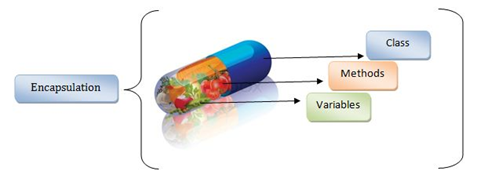

<b>The Pythonic way of getters and setters</b>
* Before going down this path, however, first ask yourself 
  * if a user will even need access to this variable
  * if the calculation is easier to access as a property of an attribute
  * if it is preferable to have an attribute that no longer exists represented this way
* Use the `@property` decorator as the getter in combination with...
* `@x.setter` decorator as the setter (most commonly used for checks and/or filters)

In [27]:
class C:
    
    def __init__(self, x):
        self.x = x
        
    @property
    def x(self):
        return self._x
    
    @x.setter
    def x(self, value):
        '''Set x to a value not above 100 or below 0.'''
        if value > 100:
            self._x = 100
        elif value < 0:
            self._x = 0
        else:
            self._x = value

In [28]:
# Try here
myc = C(105)
myc.x

100

In [29]:
myc.x = 120
myc.x

100

### Exercise

Complete the implementation of the Dog class below.

a)	A Dog object should have instance variables:
- name (a string of a dog’s name)
- species (a string of a dog’s species)
- _age (an integer)  --> make it private
- quiet (a Boolean representing whether the dog is quiet or not)

b)	A dog object should have actions below:
- a constructor
- approach(): print the string “<name> is coming to you”
- bark(): if the dog is quiet, print “I don’t bark”, otherwise, print “bark bark bark!”
- getter for _age: it returns _age


In [43]:
class Dog:

    def __init__(self, name, species, age, quiet):
        self.name = name
        self.species = species
        self._age = age
        self.quiet = quiet

    
    def approach(self):
        print(self.name, "is coming to you")

    def bark(self):
        if self.quiet == True:
            print("I don't bark")
        else:
            print("bark bark bark!")
   
    @property
    def age(self):
        return self._age


In [44]:
coco = Dog('coco', 'greyhound', 5, True)
gracie = Dog('gracie', 'chihuahua', 3, False)
coco.approach()  #should print “coco is coming to you”

coco.bark()   #should print “I don’t bark”

gracie.bark()   #should print “bark bark bark!”

gracie.age

coco is coming to you
I don't bark
bark bark bark!


3

### How to check whether a dataframe is empty?
https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.html



### To sum up:
- a definition of class encapsulates two categories of things:
    - instance variables 
    - methods
- there is not real "private" instance variables in Python
    - but we are expecting all the programmers to respect the rule that not to use `obj._variable`

- it is a good idea to use getters and setters, but use the Pythonic way
    - decorators
    